In [1]:
%load_ext autoreload
%matplotlib ipympl
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import bpy
from bpy.types import bpy_prop_array
import mathutils
import numpy as np
import clipboard

In [2]:
import sys
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

In [3]:
%autoreload 2
from Logic.node_readers_writers import *
from Logic.network_manager import NetworkManager
from Logic.meta_network import *
from Logic.structures_definitions import *

In [4]:
self = NetworkManager()
self.initialize_network()
self.generate_random_network(n_additions=4)
self.finish_network()

In [31]:
meta_nodes = [math_on_x_y_separately, tex_on_x_y_separately_then_math, burn_dodge, texture_and_mix_with_self]
meta_nodes = [burn_dodge, texture_and_mix_with_self]
manager = MetaNetworkManager(meta_nodes, max_layers=1, n_additions=2)
manager.generate_network()
nm = manager.meta_network_to_flat_network()

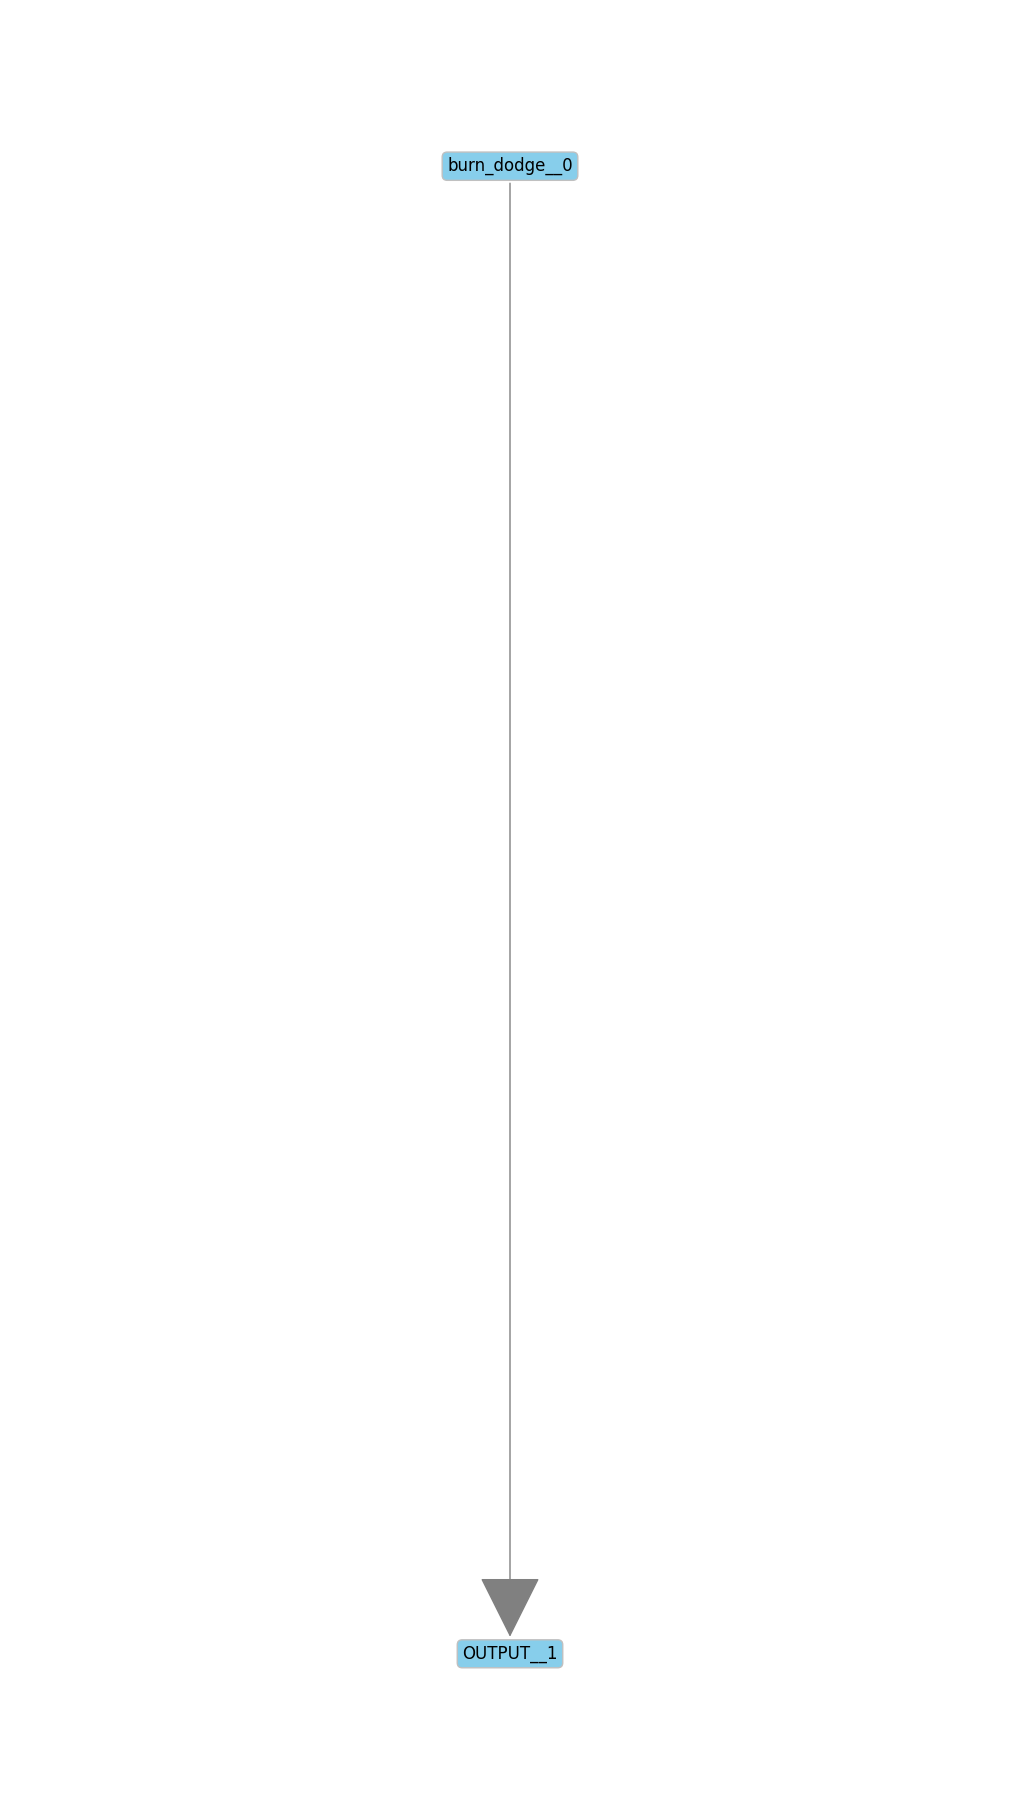

In [32]:
manager.draw_network()

In [13]:
code = nm.generate_code(with_initialization_code=True)
clipboard.copy(code)

In [15]:
dist_vals = nm.get_all_nodes_values(ParamRequestType.ALL, return_ranges=True, not_input_values=True)

In [16]:
nm.apply_distribution_limitations(dist_vals)

In [18]:
new_vals = nm.pick_random_values_from_dict(dist_vals)

In [21]:
nm.set_nodes_attributes(new_vals)
code = nm.generate_code(with_initialization_code=True)
clipboard.copy(code)

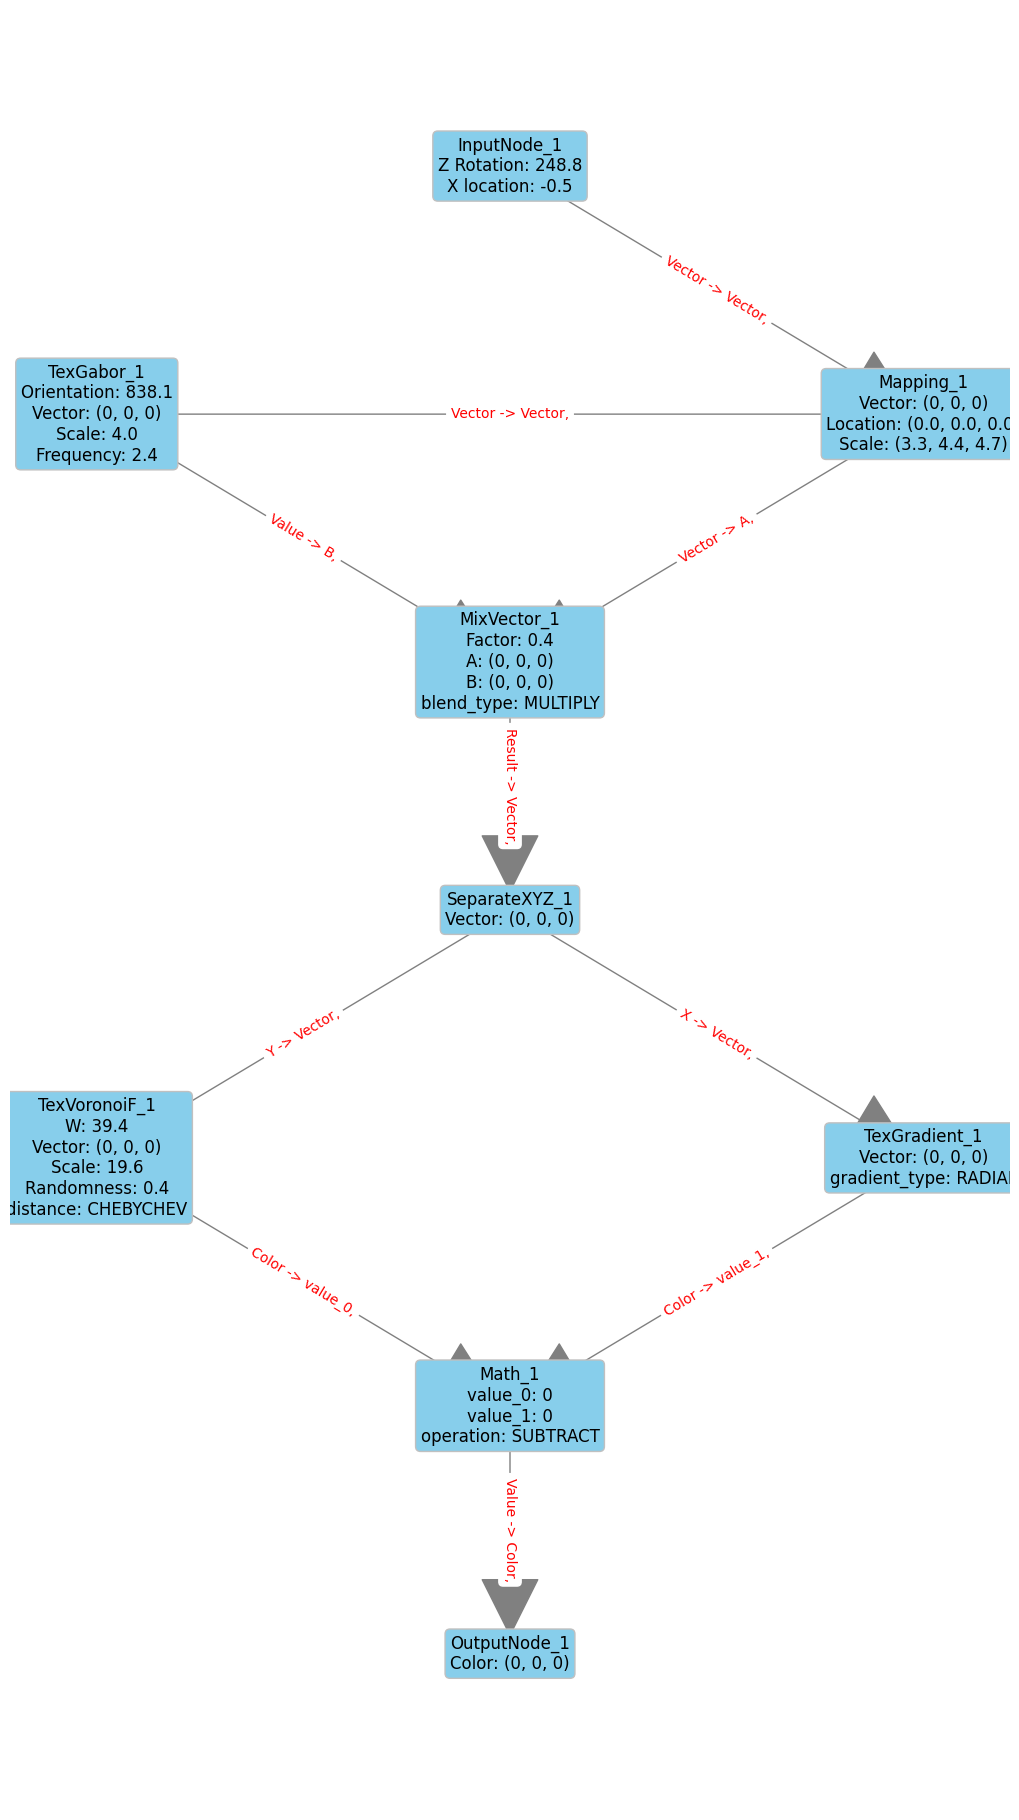

In [20]:
nm.draw_network()

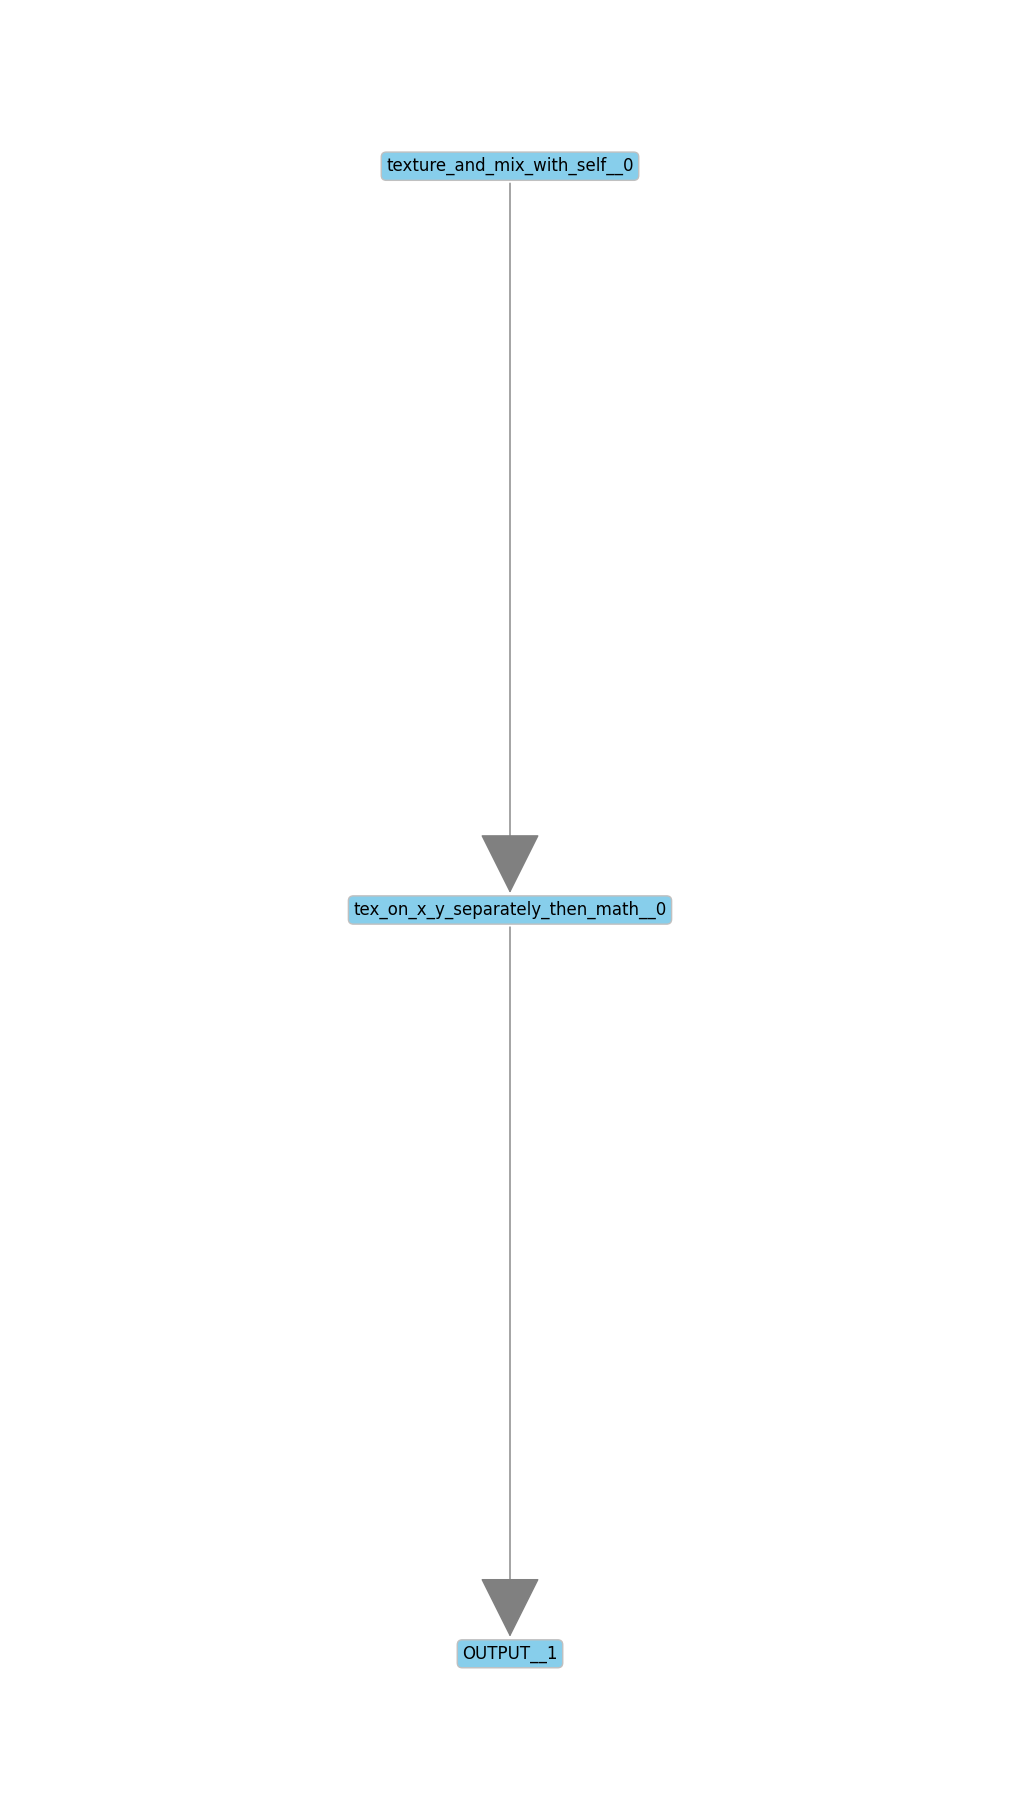